In [12]:
#Masking Raster with shapefile

In [13]:
import rasterio.mask
import fiona
import rasterio

In [14]:
#Open Shapefile with fiona

In [15]:
with fiona.open('F:\\AV Consulting\\2022\\LiLa\\TN Government\\Data\\LiLa_Nagapattinam\\Nagapattinam_proj32644.shp', 'r') as shapefile:
    for feature in shapefile:
        shapes = [feature['geometry']]

In [16]:
#Open Raster #with rasterio

In [17]:
with rasterio.open('F:\\AV Consulting\\2022\\LiLa\\TN Government\\Data\\LiLa_Nagapattinam\\DEM_T44PLT_proj32644_filled_slope - Copy.tif') as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop = True)
    out_meta = src.meta

In [18]:
out_meta.update({
    'driver':'Gtiff',
    'height': out_image.shape[1],
    'width': out_image.shape[2],
    'transform': out_transform,
})    

In [19]:
with rasterio.open('F:\\AV Consulting\\2022\\LiLa\\TN Government\\Data\\LiLa_Nagapattinam\\Output slope rasternagapattinam_slope.tif', 'w', **out_meta) as dst:
    dst.write(out_image)

In [20]:
import rasterio.plot

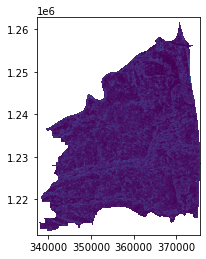

<AxesSubplot:>

In [21]:
rasterio.plot.show(rasterio.open('F:\\AV Consulting\\2022\\LiLa\\TN Government\\Data\\LiLa_Nagapattinam\\Output slope rasternagapattinam_slope.tif'))